In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
for num in range(3,7):
  globals()['df_{}'.format(num)] = pd.read_excel(('/content/drive/MyDrive/cj/1-{}. 이커머스 FC주문 데이터_{}월.xlsx').format(num-2,num))

# 새 섹션

In [155]:
def missing(df):
  msno.bar(df)
  msno.matrix(df)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


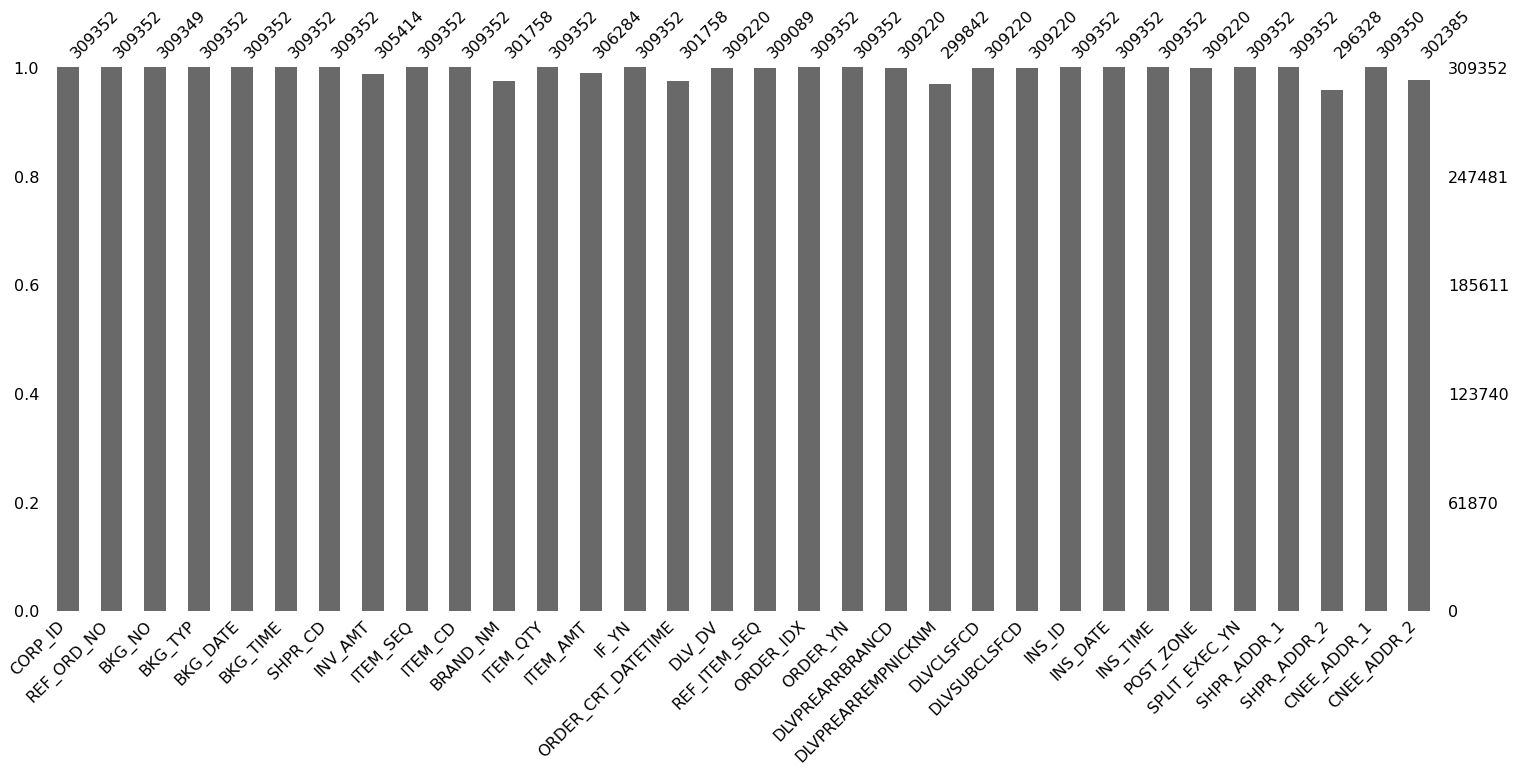

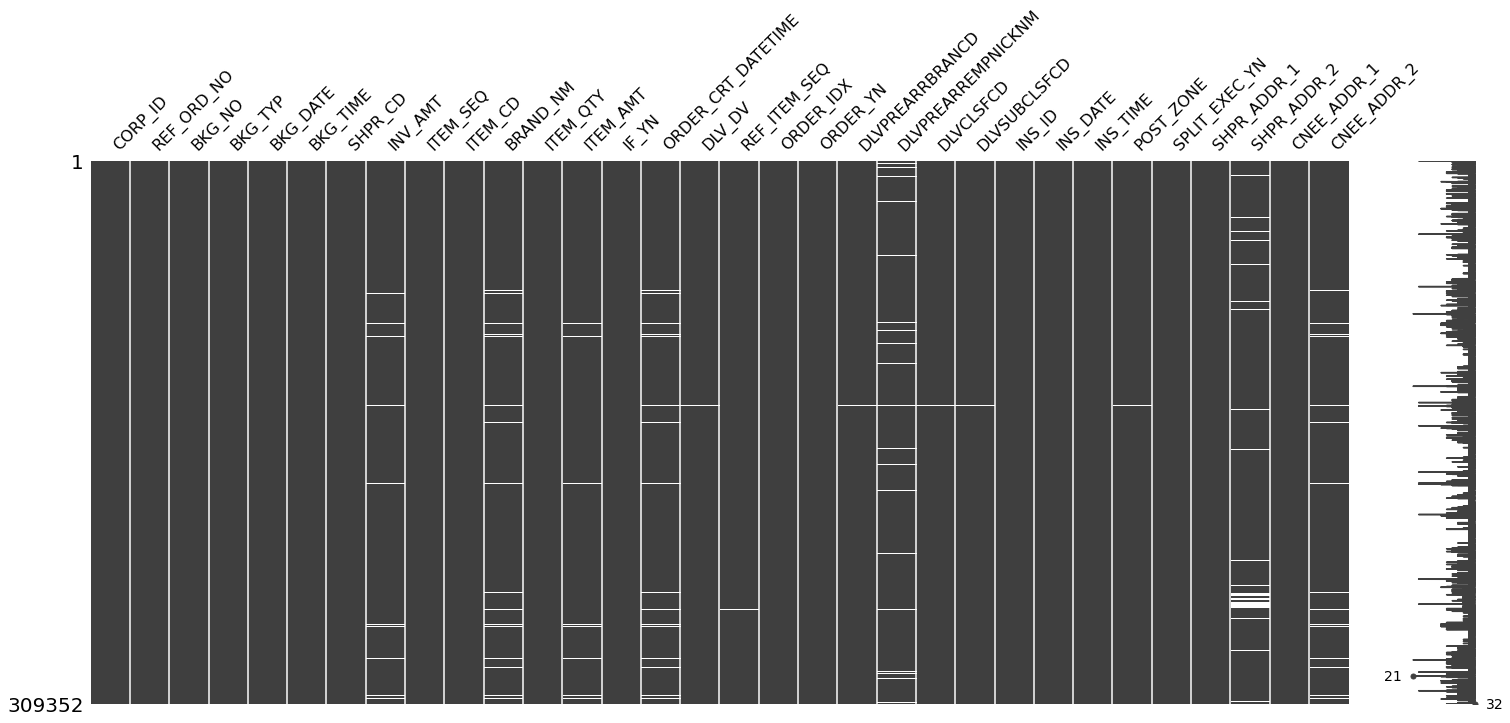

In [156]:
missing(df_3)

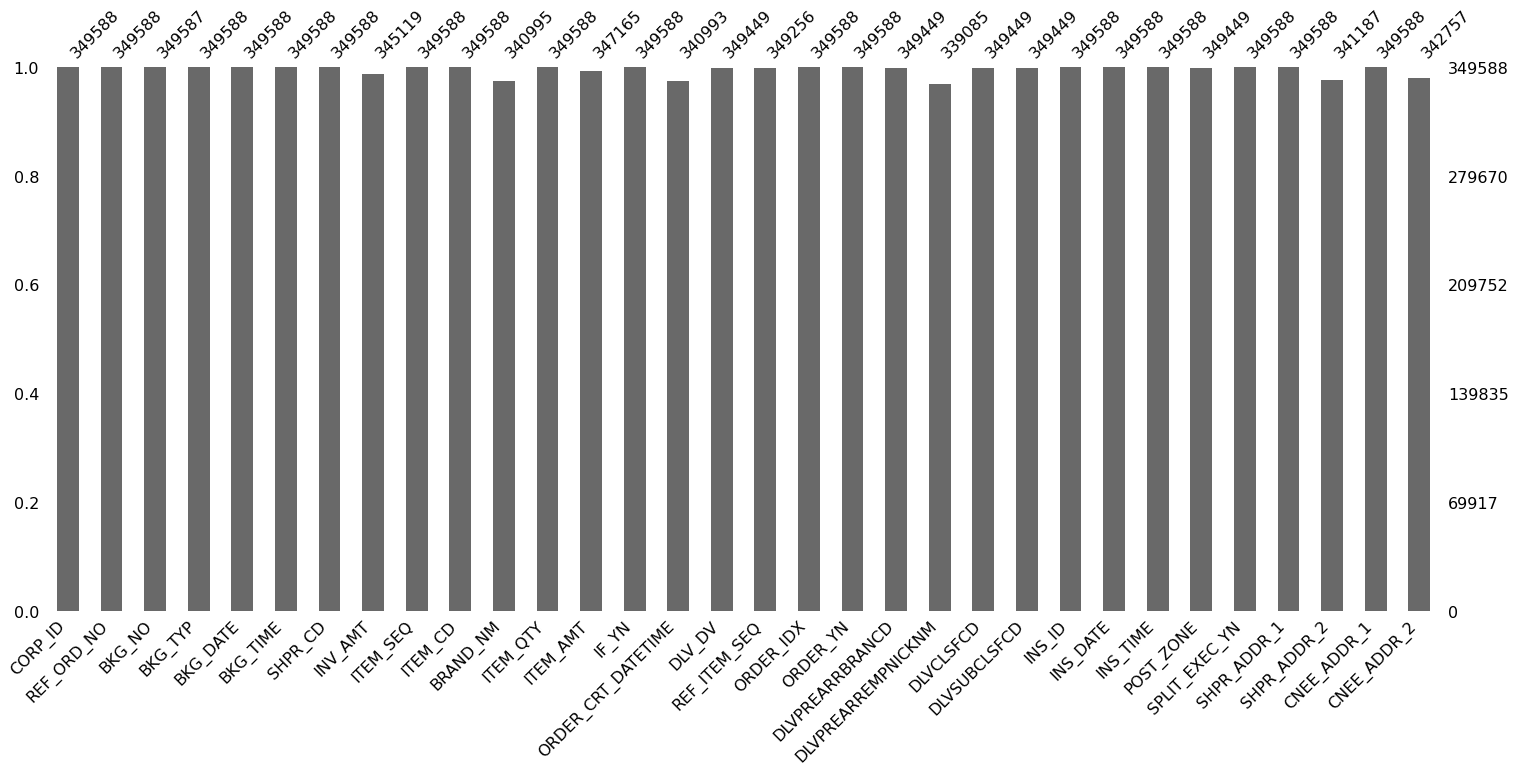

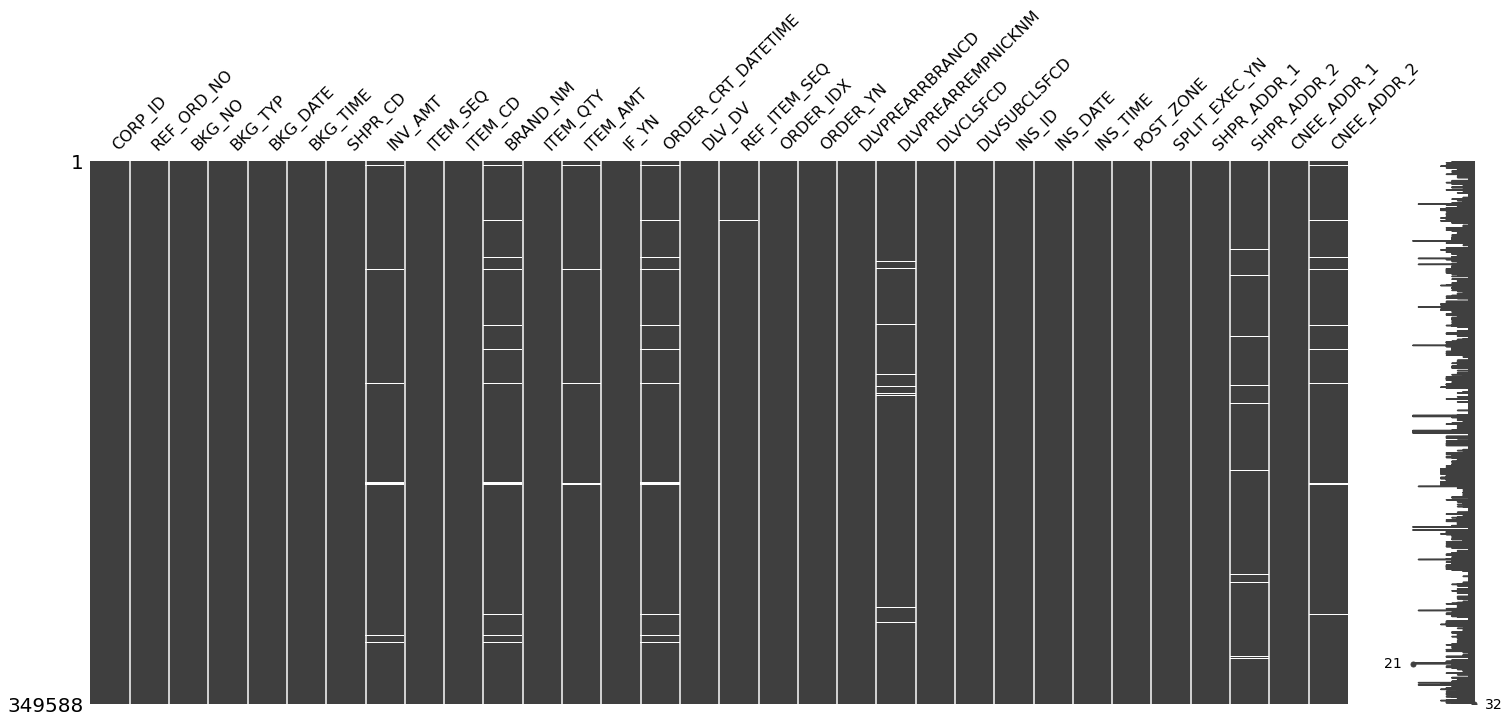

In [157]:
missing(df_4)

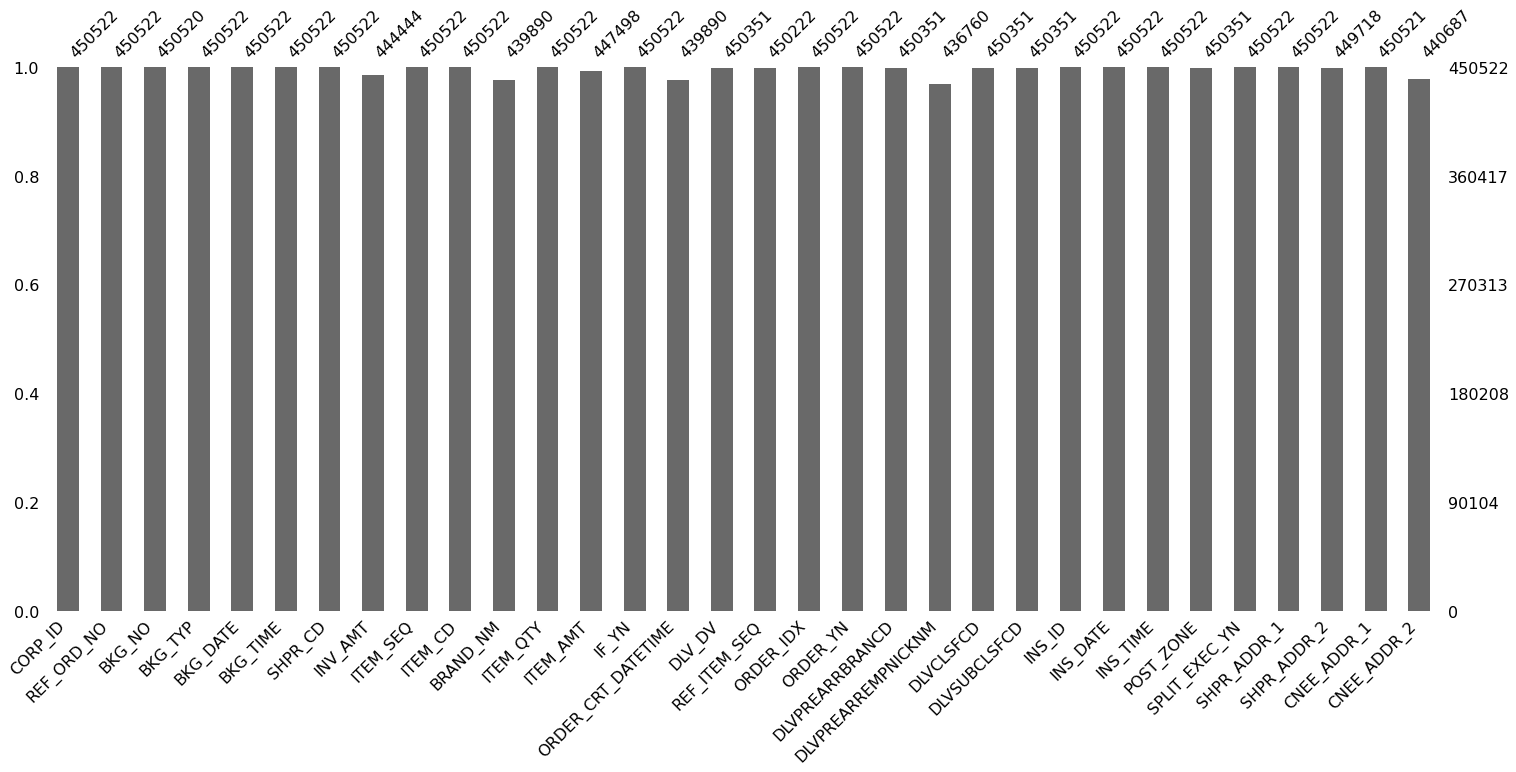

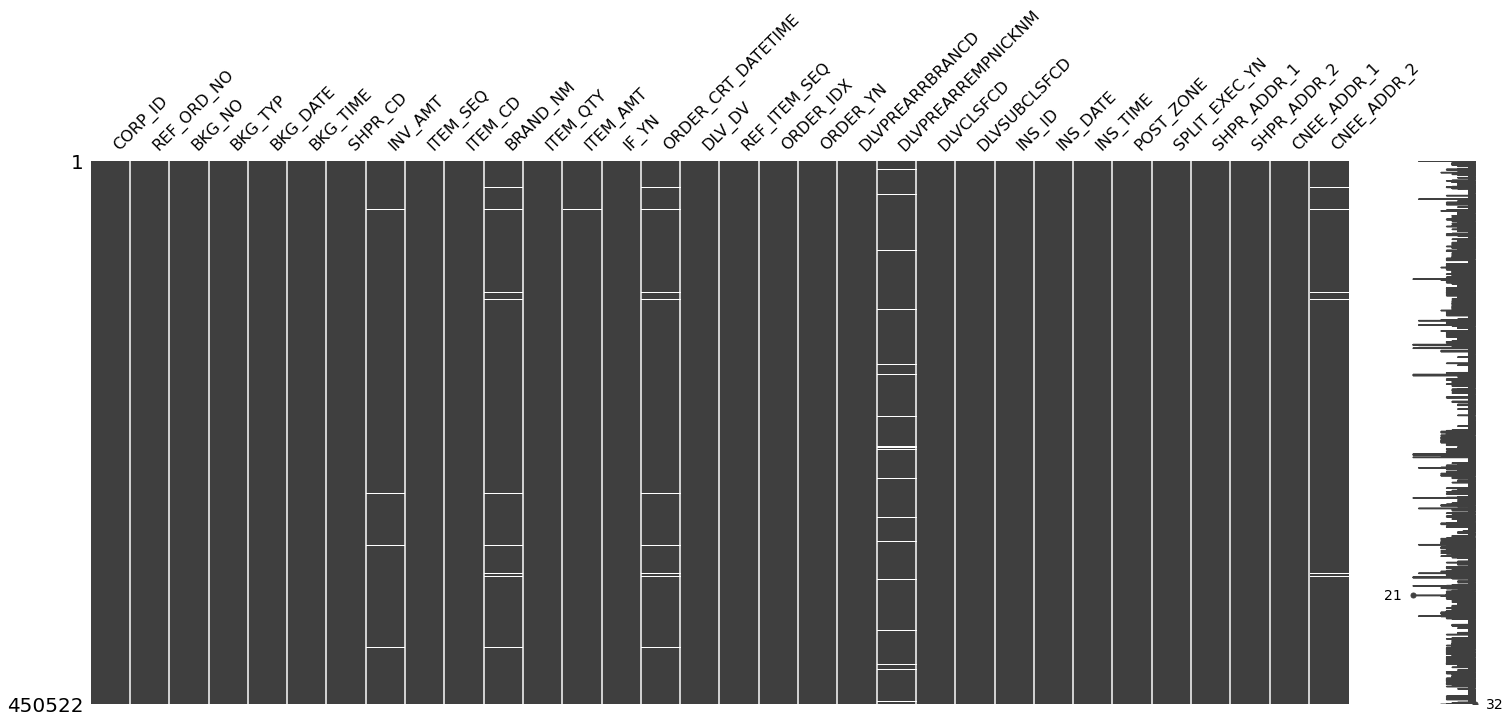

In [158]:
missing(df_5)

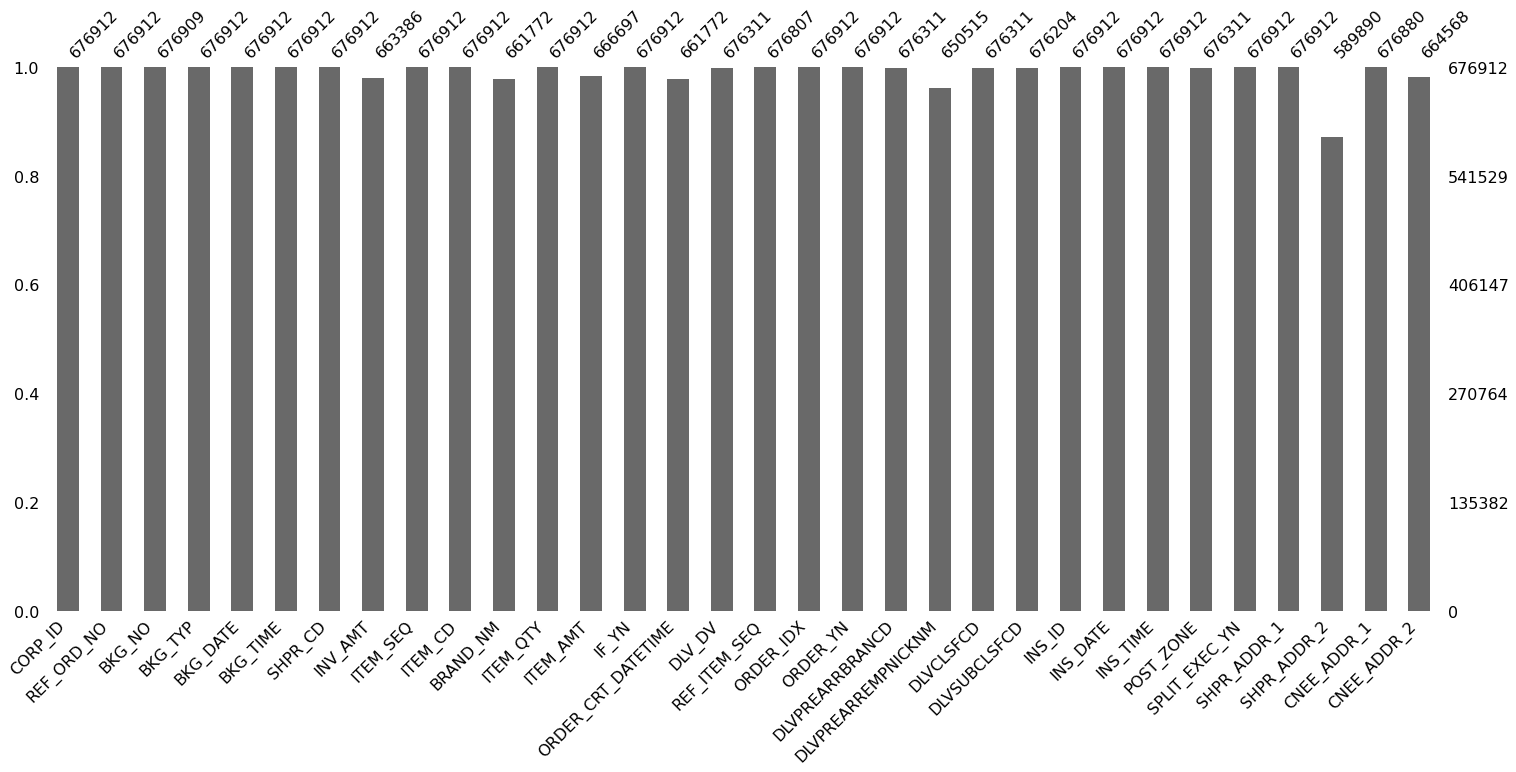

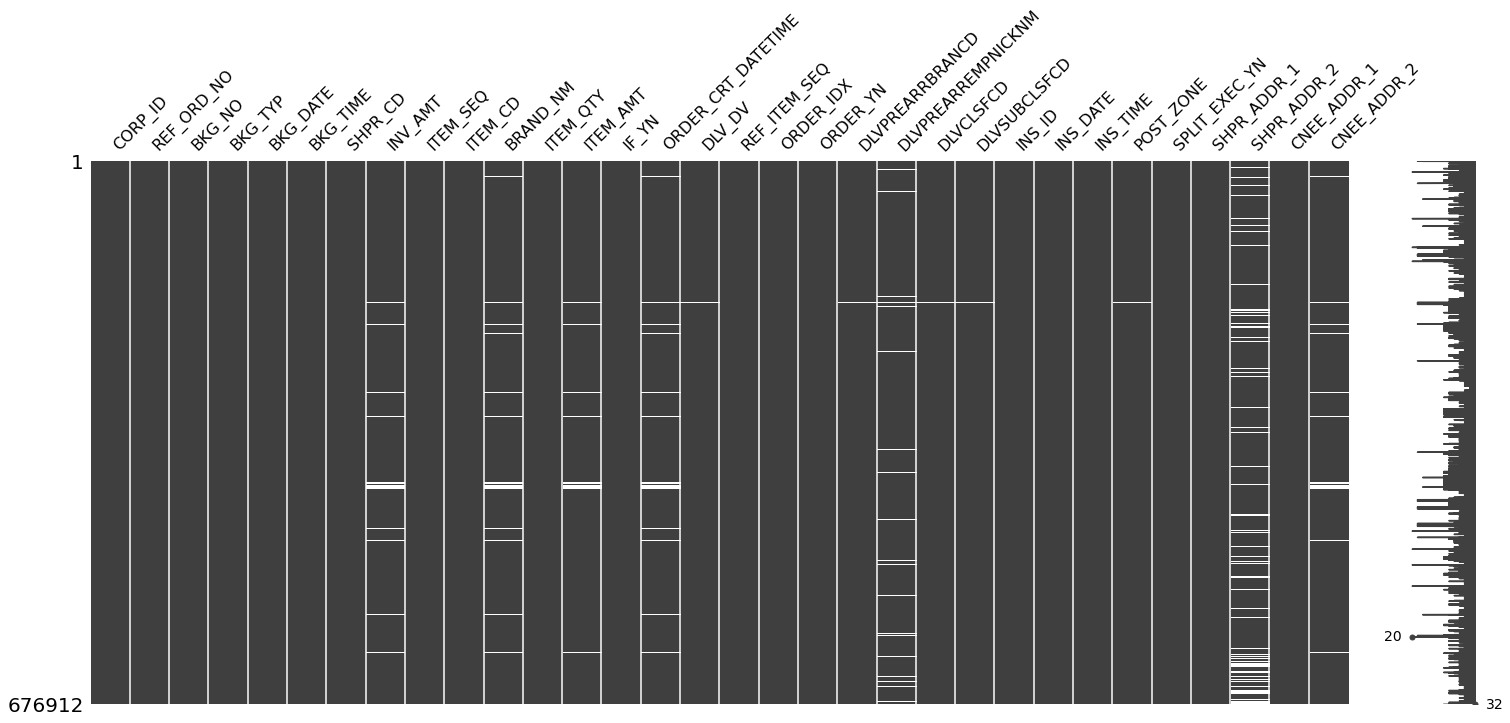

In [159]:
missing(df_6)

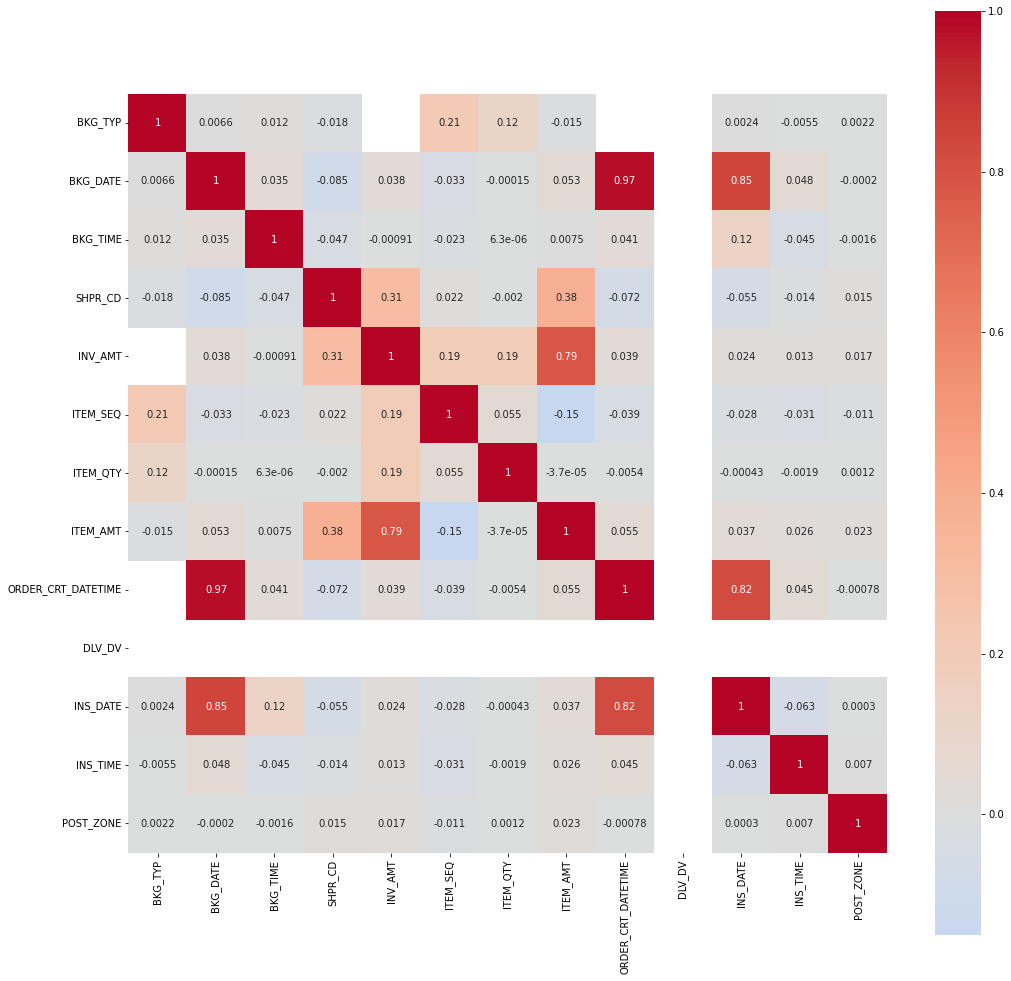

In [161]:
plt.figure(figsize=(17, 17))
correlations = df_3.corr(method='pearson')
plt.rc('font', family='NanumBarunGothic')

sns.heatmap(correlations, cmap="coolwarm", square=True, center=0, annot=True)
plt.rc('font', family='NanumBarunGothic')

In [162]:
df_5['CORP_ID'].value_counts()

KX007    445435
GP001      5087
Name: CORP_ID, dtype: int64

In [163]:
import numpy as np

In [164]:
df_5_sum_by_day_male

BKG_DATE
20210501     8868
20210502    12176
20210503    12034
20210504    10431
20210505    14189
20210506    14374
20210507     8724
20210508     7465
20210509    12523
20210510    17654
20210511    10948
20210512    11300
20210513     9837
20210514     8995
20210515    10635
20210516    23452
20210517    36024
20210518    14888
20210519    16370
20210520    15154
20210521    13587
20210522    11223
20210523    14068
20210524    15822
20210525    13654
20210526    12230
20210527    14384
20210528    19655
20210529    18243
20210530    14488
20210531    22040
Name: BKG_TYP, dtype: int64

In [178]:
def show_monthly_warehouse_ratio(df_month,month):
  df_month_sum_by_day_gonziam = df_month[df_month['CORP_ID'] == 'KX007'].groupby('BKG_DATE').BKG_TYP.count().tolist()
  df_month_sum_by_day_goonpo = df_month[df_month['CORP_ID'] == 'GP001'].groupby('BKG_DATE').BKG_TYP.count().tolist()
  gonz_len = len(df_month_sum_by_day_gonziam) - len(df_month_sum_by_day_goonpo)
  print(df_month_sum_by_day_gonziam)
  print(df_month_sum_by_day_goonpo)
  goonpo_list = []
  for num in range(0,gonz_len):
    goonpo_list.append(0)
  df_month_sum_by_day_goonpo = goonpo_list + df_month_sum_by_day_goonpo
  for i in range(1,32):
    label.append(str(i))
  N = len(df_month['BKG_DATE'].unique())
  index = np.arange(N)
  alpha = 0.5
  plt.figure(figsize=(20, 10))
  plt_gonziam = plt.bar(index, df_month_sum_by_day_gonziam, color='b', alpha=alpha)
  plt_goonpo = plt.bar(index, df_month_sum_by_day_goonpo, color='r', alpha=alpha,bottom=df_month_sum_by_day_gonziam)
  plt.title('Warehouse for CJ {0}'.format(month), fontsize=20)
  plt.ylabel('Sum of Logistics', fontsize=18)
  plt.xlabel('Day', fontsize=18)
  plt.xticks(index, label, fontsize=20)
  plt.legend((plt_gonziam[0], plt_goonpo[0]), ('Gonziam', 'Goonpo'), fontsize=15)
  plt.show()

# 5월 17일에 물량이 많은데 Complain이 많이 발생해서 물량을 뺀게 아닐까?
+ 15일 -> 스승의날?
+ 택배 노조 같은 이슈 조사
+ 코로나 거리두기 단계?

[8868, 12176, 12034, 10431, 14189, 14374, 8724, 7465, 12523, 17654, 10948, 11300, 9837, 8995, 10635, 23452, 36024, 14888, 16370, 15154, 13587, 11223, 14068, 15822, 13654, 12230, 14384, 19655, 18243, 14488, 22040]
[211, 390, 1, 1, 4484]


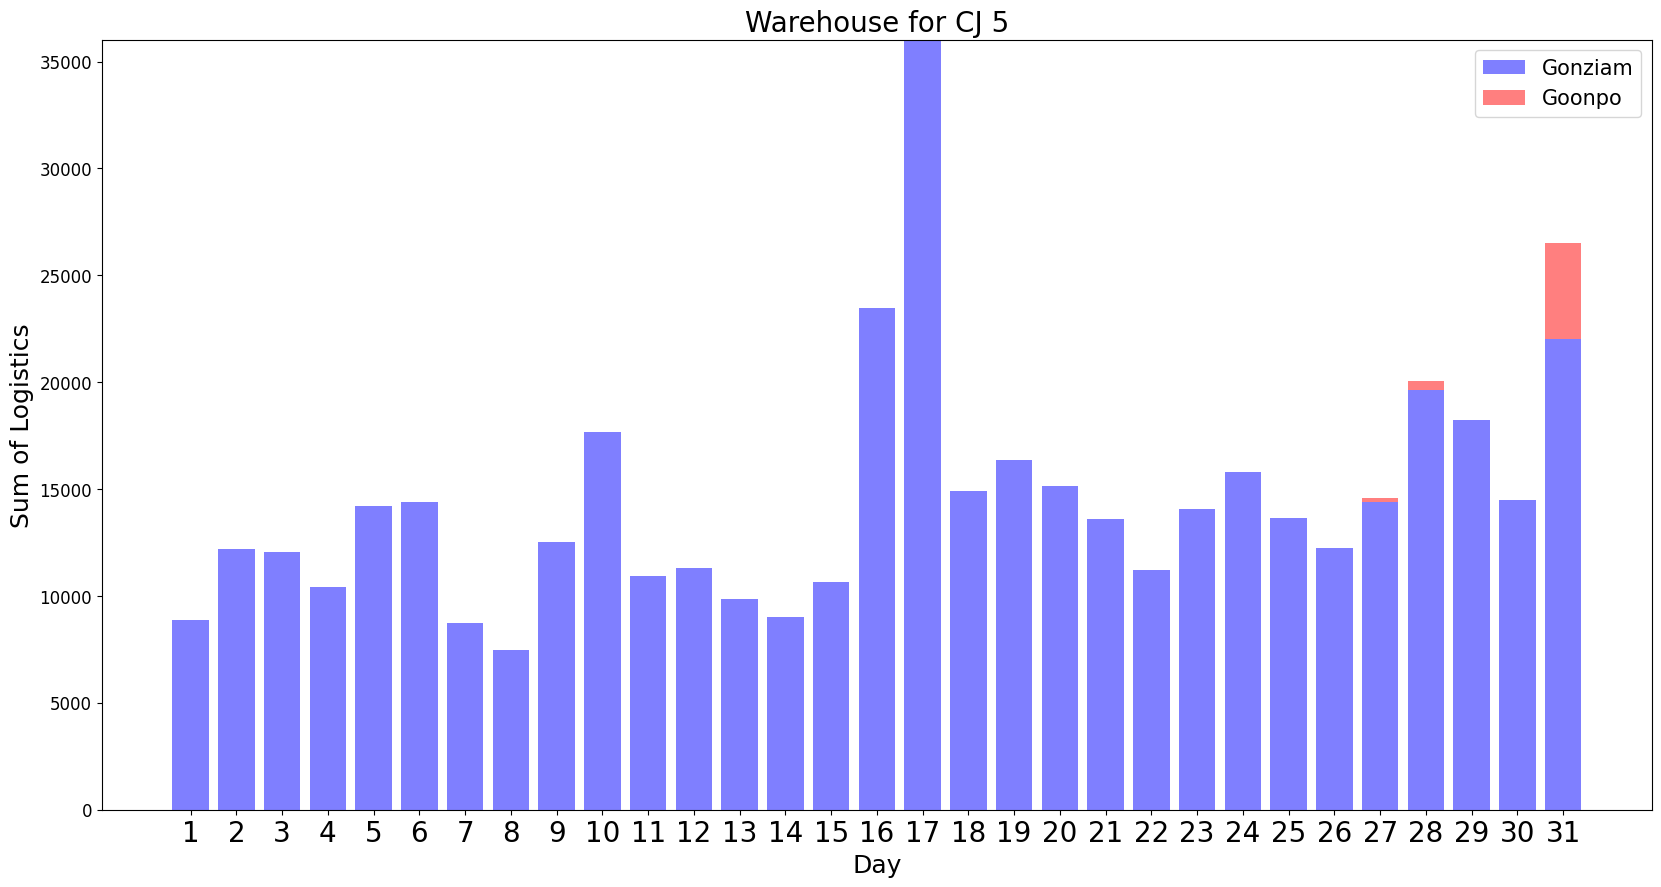

In [180]:
show_monthly_warehouse_ratio(df_5,5)

[16812, 16377, 14854, 16304, 14075, 15058, 27643, 32230, 16632, 18756, 16138, 11572, 32142, 18630, 14570, 13522, 20468, 15577, 10247, 12546, 16280, 14786, 13440, 12570, 13753, 12741, 15589, 18636, 15412, 14275]
[5165, 4641, 4684, 3383, 2858, 4243, 5118, 6915, 4239, 4166, 3455, 2950, 4283, 5590, 5691, 9084, 4424, 4004, 2840, 4689, 6294, 5499, 5409, 5207, 4453, 3663, 5203, 10027, 7065, 30035]


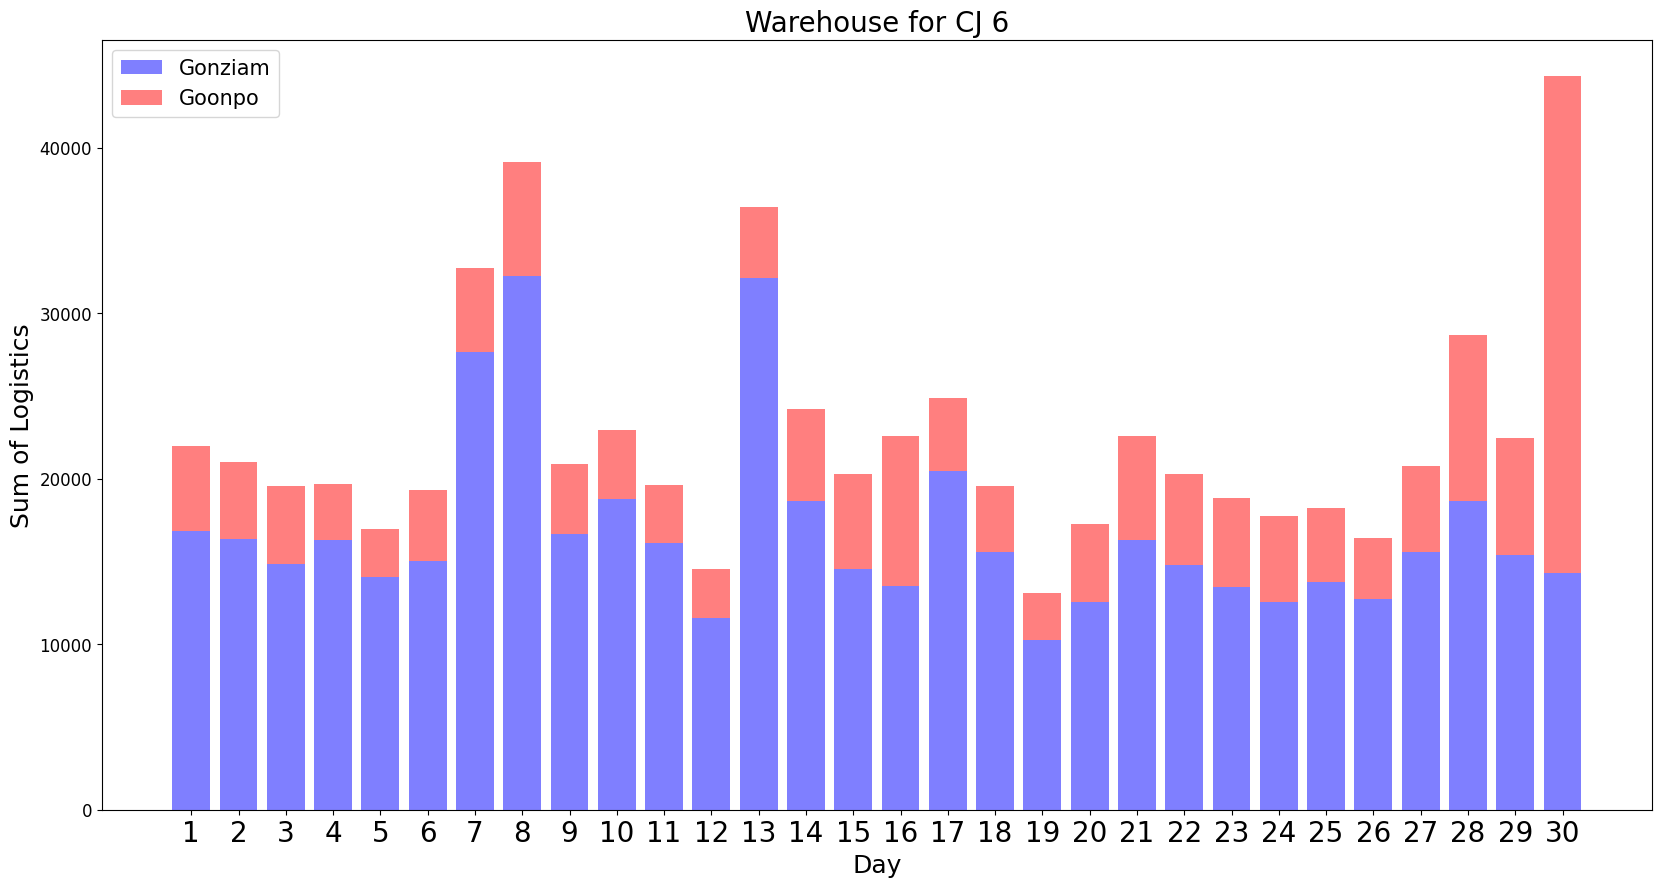

In [179]:
show_monthly_warehouse_ratio(df_6,6)

In [168]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib import font_manager, rc
# from matplotlib import style
# month_d = df["cluster"].value_counts()
# info = list(month_d.index)
# num = list(month_d)
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)
# plt.rcParams['figure.figsize'] = (10,10)
# plt.pie(num, labels=info, autopct="%0.1f%%",colors=colors)
# plt.title('클러스터 비율')
# plt.show()

NameError: ignored

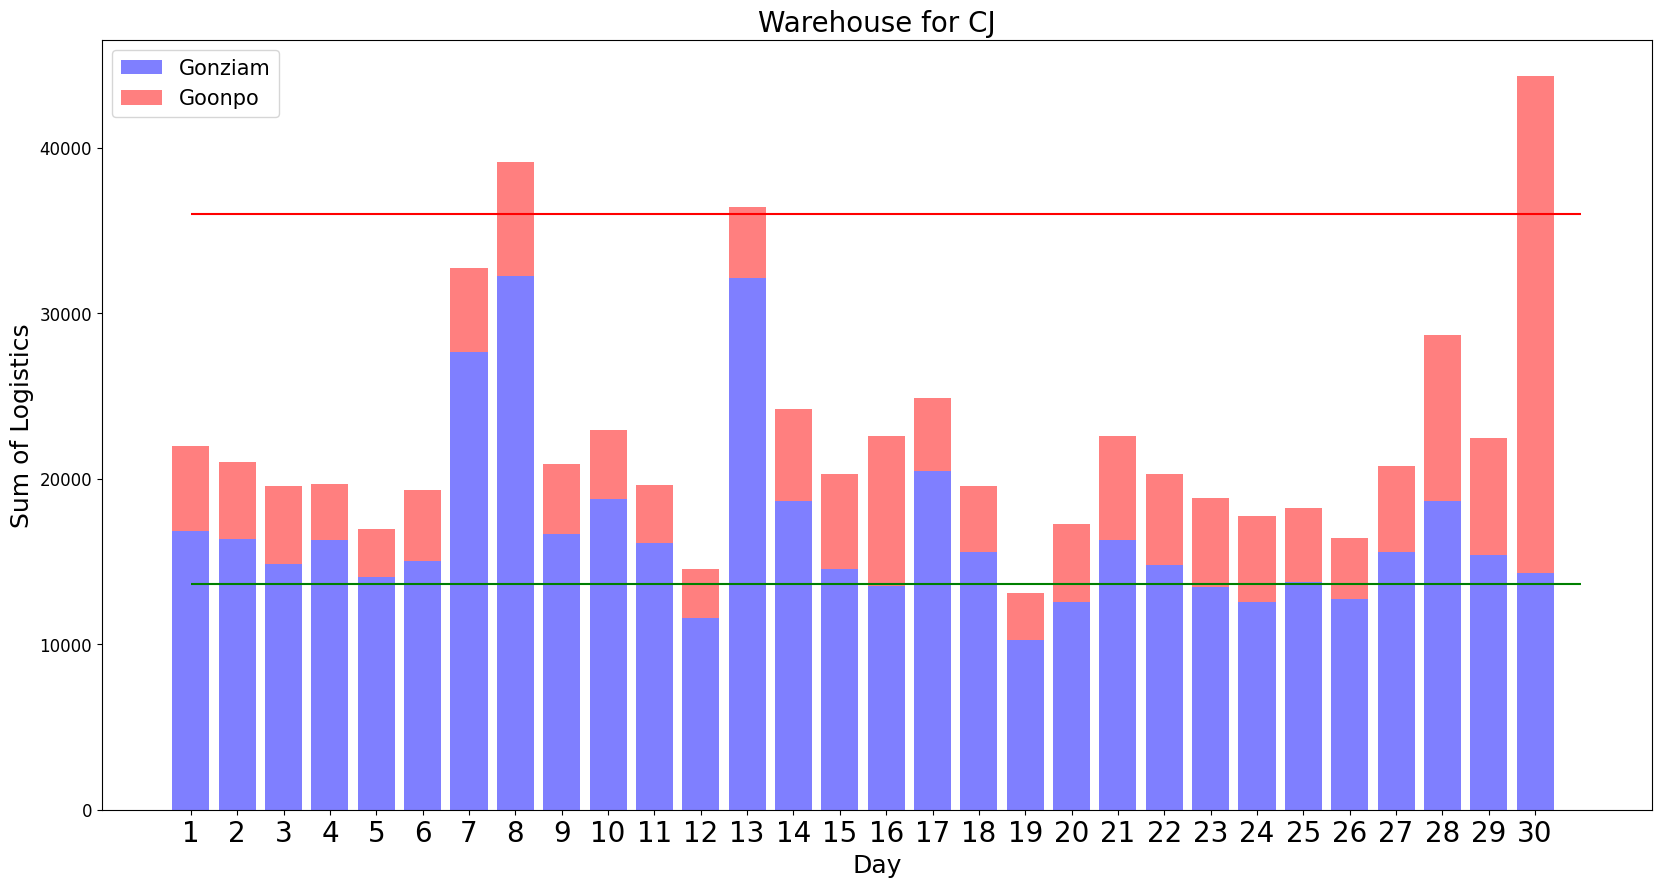

In [186]:
df_month_sum_by_day_gonziam = df_6[df_6['CORP_ID'] == 'KX007'].groupby('BKG_DATE').BKG_TYP.count().tolist()
df_month_sum_by_day_goonpo = df_6[df_6['CORP_ID'] == 'GP001'].groupby('BKG_DATE').BKG_TYP.count().tolist()
gonz_len = len(df_month_sum_by_day_gonziam) - len(df_month_sum_by_day_goonpo)
goonpo_list = []
for num in range(0,gonz_len):
  goonpo_list.append(0)
df_month_sum_by_day_goonpo = goonpo_list + df_month_sum_by_day_goonpo
for i in range(1,32):
  label.append(str(i))
N = len(df_6['BKG_DATE'].unique())
index = np.arange(N)
alpha = 0.5
plt.figure(figsize=(20, 10))
plt_gonziam = plt.bar(index, df_month_sum_by_day_gonziam, color='b', alpha=alpha)
plt_goonpo = plt.bar(index, df_month_sum_by_day_goonpo, color='r', alpha=alpha,bottom=df_month_sum_by_day_gonziam)
plt.title('Warehouse for CJ', fontsize=20)
plt.ylabel('Sum of Logistics', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.xticks(index, label, fontsize=20)
plt.hlines(36024, 0, 30, 'y',color ='r')
plt.hlines(13654, 0, 30, 'y',color = 'g')
plt.legend((plt_gonziam[0], plt_goonpo[0]), ('Gonziam', 'Goonpo'), fontsize=15)
plt.show()

In [204]:
def date_com(df):
  a = pd.to_datetime(df['BKG_DATE'].astype(str).str[0:4] +  "-"+df['BKG_DATE'].astype(str).str[4:6] + "-" +df['BKG_DATE'].astype(str).str[6:])
  b = pd.to_datetime(df['INS_DATE'].astype(str).str[0:4] +  "-"+df['INS_DATE'].astype(str).str[4:6] + "-" +df['INS_DATE'].astype(str).str[6:])
  c= (b - a).value_counts()
  print(c)
  print(c[0]/c.sum())

In [205]:
date_com(df_3)

0 days     252779
1 days      56191
2 days        291
3 days         33
-1 days        28
4 days         12
9 days          4
8 days          4
6 days          3
10 days         2
5 days          2
11 days         1
-4 days         1
13 days         1
dtype: int64
0.8171241821614212


In [206]:
date_com(df_4)

0 days     282324
1 days      66759
2 days        315
3 days        121
6 days         40
5 days          8
7 days          7
-3 days         5
4 days          4
9 days          3
-1 days         1
-2 days         1
dtype: int64
0.8075906495646303


In [207]:
date_com(df_5)

0 days     364514
1 days      84732
2 days        780
3 days        237
5 days         72
4 days         66
-1 days        47
7 days         32
8 days         15
9 days         10
-2 days         9
6 days          8
dtype: int64
0.809092563737176


In [208]:
date_com(df_6)

0 days     561636
1 days     113842
2 days        636
4 days        546
3 days        164
-1 days        34
12 days        15
-2 days         8
10 days         6
16 days         6
5 days          5
6 days          5
8 days          3
13 days         2
-3 days         1
9 days          1
31 days         1
15 days         1
dtype: int64
0.8297031224147304


In [ ]:
2